In [1]:
import matplotlib.pyplot as plt


import pandas as pd

filename = "results/he/surface_flux_flibe_top.csv"
df = pd.read_csv(filename)

df

,t(s),T flux surface 8
0,1.000000e+02,1.283397e+01
1,2.100000e+02,5.738234e+01
2,2.100000e+02,2.160728e+01
3,3.310000e+02,8.258739e+01
4,3.310000e+02,2.877138e+01
...,...,...
180,4.349320e+06,4.661972e-08
181,4.783292e+06,1.761659e-08
182,4.783292e+06,4.563049e-08
183,5.260662e+06,1.665931e-08


In [3]:
# sum the duplicate times
df = df.groupby("t(s)").sum().reset_index()
df

,t(s),T flux surface 8
0,1.000000e+02,1.283397e+01
1,2.100000e+02,7.898961e+01
2,3.310000e+02,1.113588e+02
3,4.641000e+02,1.418091e+02
4,6.105100e+02,1.711442e+02
...,...,...
88,3.596144e+06,6.980392e-08
89,3.954799e+06,6.748039e-08
90,4.349320e+06,6.528893e-08
91,4.783292e+06,6.324707e-08


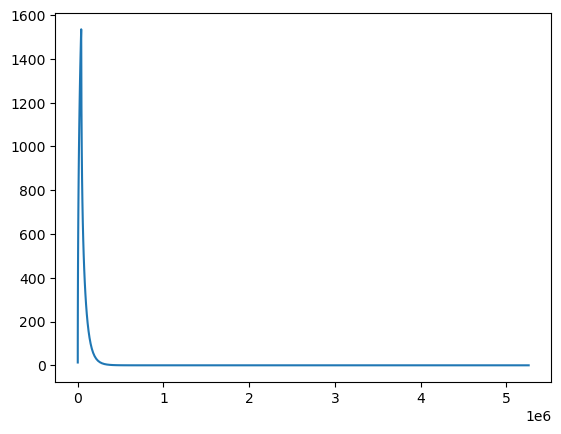

In [ ]:
plt.plot(df["t(s)"], df["T flux surface 8"])

In [7]:
import requests

# read experimental data
url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/tags/v0.5/data/processed_data.json"
experimental_data = requests.get(url).json()
cumulative_release_exp_inner = experimental_data["cumulative_tritium_release"]["IV"][
    "total"
]["value"]
sampling_times_inner = experimental_data["cumulative_tritium_release"]["IV"][
    "sampling_times"
]["value"]
cumulative_release_exp_outer = experimental_data["cumulative_tritium_release"]["OV"][
    "total"
]["value"]
sampling_times_outer = experimental_data["cumulative_tritium_release"]["OV"][
    "sampling_times"
]["value"]


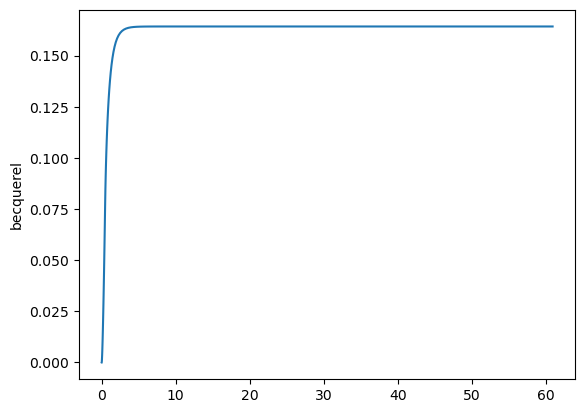

In [11]:
from scipy.integrate import cumulative_trapezoid
from libra_toolbox.tritium.model import quantity_to_activity, ureg

cumul_release = cumulative_trapezoid(df["T flux surface 8"], df["t(s)"], initial=0) * ureg.particle
cumul_release = quantity_to_activity(cumul_release).to(ureg.Bq)

s_to_days = 1 / 24 / 3600
plt.plot(df["t(s)"] * s_to_days, cumul_release)

# plt.scatter(sampling_times_inner, cumulative_release_exp_inner * ureg.Bq)